### • Median Consensus

Suppose the sensor network now aims to compute the **median** of the measurement data.

- Implement the **median consensus problem** using the **PDMM algorithm**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib as mpl
from matplotlib.animation import PillowWriter
from IPython.display import Image
from helper import min_radius_for_sensors
from pdmm_median_consensus import median_consensus

Minimum required radius for connectivity with probability: 99.96000000000001 (n=50, area=100x100): 39.56 m


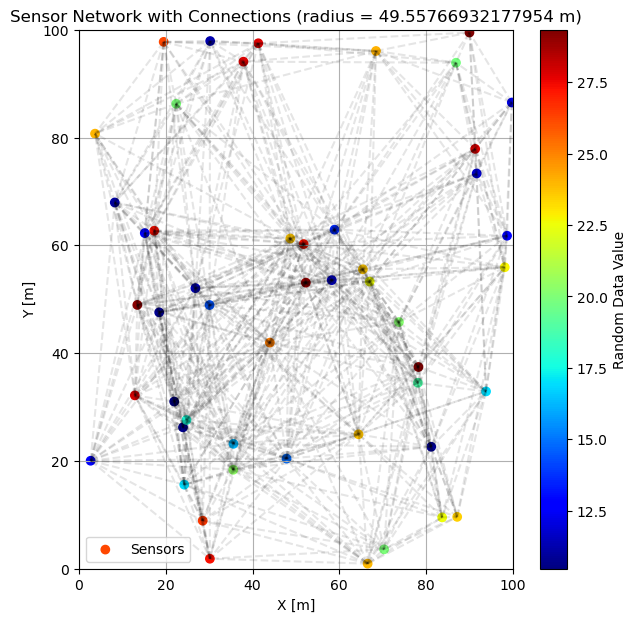

In [2]:
# Parameters
NUM_SENSORS = 50
AREA_WIDTH = 100  # meters
DIMENSION = 2

# Ensure all sensors are connected with the desired radius
radius = min_radius_for_sensors(NUM_SENSORS, DIMENSION, AREA_WIDTH) + 10 # Add some margin for faster convergence

# Generate random sensor positions again for the augmented plot
coords = np.random.uniform(low = 0, high = AREA_WIDTH, size = (NUM_SENSORS, DIMENSION))

# coords has shape (N, 2)
random_column = np.random.uniform(low=10, high=30, size=(coords.shape[0], 1))  # shape (N, 1)

# concatenate along axis=1 (columns)
coords_augmented = np.hstack((coords, random_column))  # shape (N, DIMENSION + 1)

# Compute pairwise distances
dists = np.sqrt(np.sum((coords_augmented[:, None, 0:2] - coords_augmented[None, :, 0:2])**2, axis=-1))

adjacency = (dists <= radius) & (dists > 0)

# Create figure
plt.figure(figsize=(7, 7))

# Scatter plot with color based on random data
sc = plt.scatter(x = coords[:,0], y = coords[:,1], c=coords_augmented[:,2].flatten(), cmap='jet', label='Sensors')

# Draw dashed black lines for connected sensors
for i in range(NUM_SENSORS):
    neighbors = np.where(adjacency[i])[0]
    for j in neighbors:
        if i < j:  # Avoid duplicates
            plt.plot([coords[i, 0], coords[j, 0]],
                     [coords[i, 1], coords[j, 1]],
                     'k--', alpha=0.1)

# Add colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Random Data Value')

# Final plot settings
plt.xlim(0, AREA_WIDTH)
plt.ylim(0, AREA_WIDTH)
plt.title(f'Sensor Network with Connections (radius = {radius} m)')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.grid(True)
plt.legend()
plt.show()

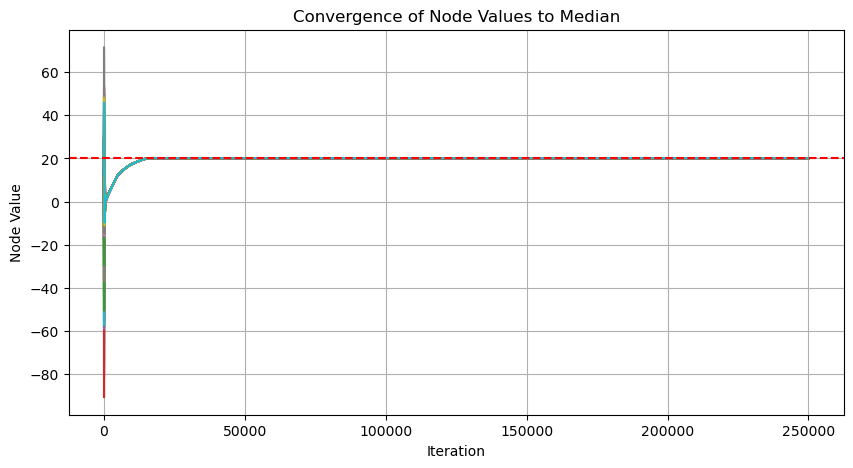

Converged in 5000 iterations with median value: 20.24021429752181, final error: 0.06884479993957, normalized error: 0.02405143748535


In [4]:
#from pdmm_median_consensus import median_consensus

# Run median consensus algorithm
k, median_value, history, tx = median_consensus(adjacency, coords_augmented[:, 2], num_iters=5000, c=0.32, verbose=False, 
                                                Broadcast=True, transmission_loss=0.0, min_error=1e-2)
# Plot convergence of values
plt.figure(figsize=(10, 5))
plt.plot(tx, history, label='Node Values')
plt.axhline(y=median_value, color='r', linestyle='--', label='True Median')
plt.title('Convergence of Node Values to Median')
plt.xlabel('Iteration')
plt.ylabel('Node Value')
plt.grid()
plt.show()

#print the final error:
final_error = np.max(np.abs(history[-1] - median_value))
final_normalized_error = np.linalg.norm(history[-1] - median_value) / np.linalg.norm(median_value)
print(f"Converged in {k} iterations with median value: {median_value:.14f}, final error: {final_error:.14f}, normalized error: {final_normalized_error:.14f}")



In [ ]:
# optimize c value for the median consensus algorithm
c = np.linspace(0.01, 1, 20)
# Calculate amount of iterations for each c
iterations = []
transmissions = []
for c_value in tqdm(c):
    k, _, _, tx = median_consensus(adjacency, coords_augmented[:, 2], num_iters=5000, c=c_value, verbose=False,min_error=2e-2)
    iterations.append(k)
    transmissions.append(tx[-1])


100%|██████████| 20/20 [01:24<00:00,  4.24s/it]

c values: [0.01       0.06210526 0.11421053 0.16631579 0.21842105 0.27052632
 0.32263158 0.37473684 0.42684211 0.47894737 0.53105263 0.58315789
 0.63526316 0.68736842 0.73947368 0.79157895 0.84368421 0.89578947
 0.94789474 1.        ]
Iterations: [2000, 2000, 2000, 2000, 2000, 2000, 478, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000]
Transmission: [100000, 100000, 100000, 100000, 100000, 100000, 23900, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000]


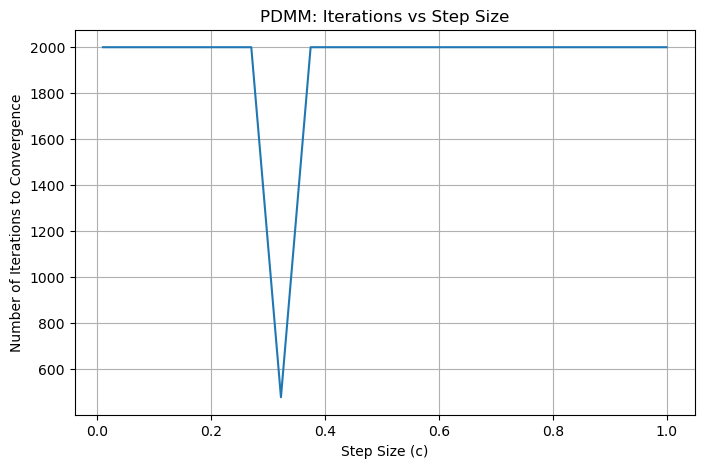

Minimum iterations: 478 for c = 0.32263157894736844


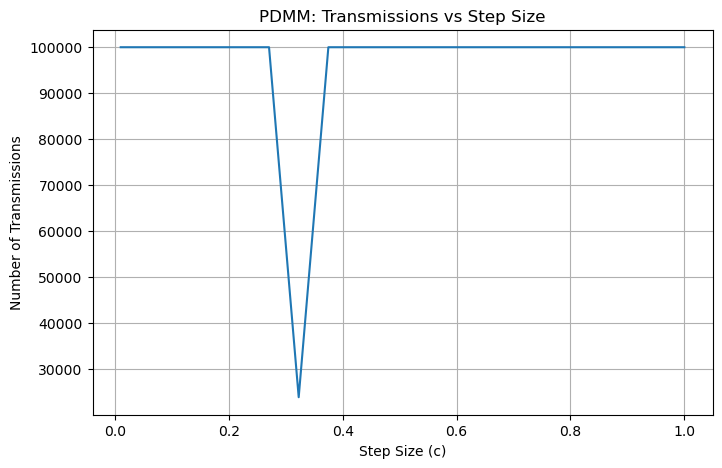

Minimum transmissions: 23900 for c = 0.32263157894736844


In [ ]:
# plot in two subfigures 
# Plot iterations vs c
plt.figure(figsize=(8, 5))
plt.plot(c, iterations)
plt.xlabel('Step Size (c)')
plt.ylabel('Number of Iterations to Convergence')
plt.title('PDMM: Iterations vs Step Size')
plt.grid(True)
plt.show()

# print the c value that gives the least number of iterations
min_iterations = min(iterations)
print(f'Minimum iterations: {min_iterations} for c = {c[np.argmin(iterations)]}')

# Plot transmissions vs c
plt.figure(figsize=(8, 5))
plt.plot(c, transmissions)
plt.xlabel('Step Size (c)')
plt.ylabel('Number of Transmissions')
plt.title('PDMM: Transmissions vs Step Size')
plt.grid(True)
plt.show()

# print the c value that gives the least number of transmissions
min_transmissions = min(transmissions)
optimal_c = c[np.argmin(transmissions)]
print(f'Minimum transmissions: {min_transmissions} for c = {optimal_c}')

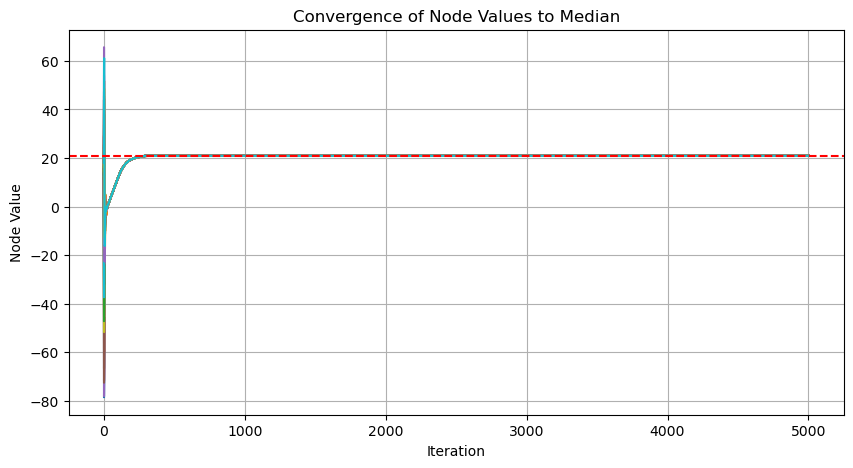

Converged in 5000 iterations with median value: 20.85032621701146, final error: 0.01740685975844, normalized error: 0.00590326906459


In [4]:
# Run median consensus algorithm
k, median_value, history, tx = median_consensus(adjacency, coords_augmented[:, 2], num_iters=5000, c=0.32, verbose=False, 
                                                Broadcast=True, transmission_loss=0.0, min_error=1e-4)

# Plot convergence of values
plt.figure(figsize=(10, 5))
plt.plot(history, label='Node Values')
plt.axhline(y=median_value, color='r', linestyle='--', label='True Median')
plt.title('Convergence of Node Values to Median')
plt.xlabel('Iteration')
plt.ylabel('Node Value')
plt.grid()
plt.show()

#print the final error:
final_error = np.max(np.abs(history[-1] - median_value))
final_normalized_error = np.linalg.norm(history[-1] - median_value) / np.linalg.norm(median_value)
print(f"Converged in {k} iterations with median value: {median_value:.14f}, final error: {final_error:.14f}, normalized error: {final_normalized_error:.14f}")

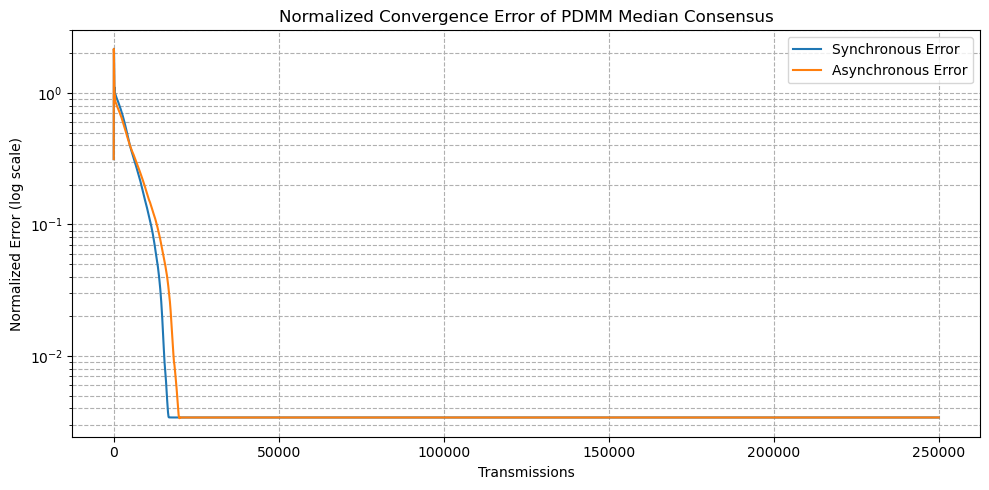

In [5]:
# Calculate the error for synchronous and asynchronous updates with c=0.32
synchronous_transmissions = []
asynchronous_transmissions = []
k_sync, median_value_sync, history_sync, tx_sync = median_consensus(adjacency, coords_augmented[:, 2], num_iters=5000, c=0.32, verbose=False,
                                                Broadcast=True, transmission_loss=0.0, min_error=1e-4, synchronous=True)
k_async, median_value_async, history_async, tx_async = median_consensus(adjacency, coords_augmented[:, 2], num_iters=10000, c=0.32, verbose=False,
                                                Broadcast=True, transmission_loss=0.0, min_error=1e-4, synchronous=False)

n = history_sync.shape[1]  # number of nodes

# True value vector for normalization
denom_sync = np.linalg.norm(median_value_sync * np.ones(n))
denom_async = np.linalg.norm(median_value_async * np.ones(n))

# Normalized max absolute error per iteration
synchronous_error = np.linalg.norm(history_sync - median_value_sync, axis=1) / denom_sync
asynchronous_error = np.linalg.norm(history_async - median_value_async, axis=1) / denom_async

# Plot on log scale
plt.figure(figsize=(10, 5))
plt.plot(tx_sync, synchronous_error, label='Synchronous Error')
plt.plot(tx_async, asynchronous_error, label='Asynchronous Error')
plt.yscale("log")
plt.xlabel('Transmissions')
plt.ylabel('Normalized Error (log scale)')
plt.title('Normalized Convergence Error of PDMM Median Consensus')
plt.legend()
plt.grid(True, which="both", linestyle='--')
plt.tight_layout()
plt.show()

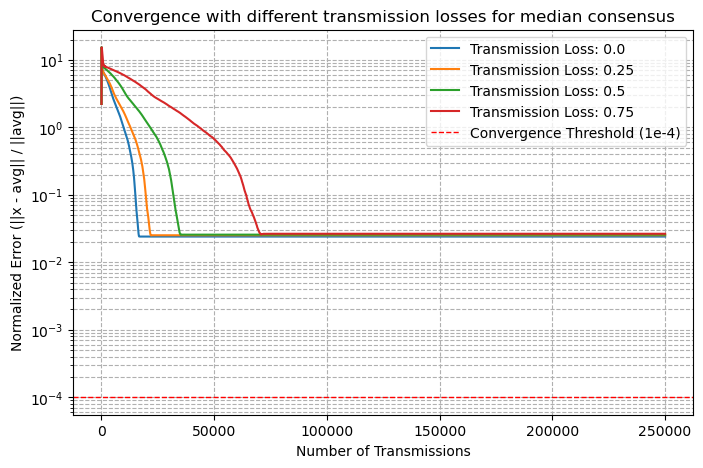

<Figure size 640x480 with 0 Axes>

In [6]:
# Now plot broadcasting pdmm with different transmission losses
transmission_losses = [0.0, 0.25, 0.5, 0.75]
plt.figure(figsize=(8, 5))

for loss in transmission_losses:
    k, real_median, pdmm_history_losses, transmissions_losses = median_consensus(adjacency, coords_augmented[:, 2], num_iters=5000, c=0.32, verbose=False,
                                                Broadcast=True, transmission_loss=loss, min_error=1e-4, synchronous=True)
    
    # Calculate the normalized error at each iteration for the current transmission loss
    losses_errors = [np.linalg.norm(x - real_median) / np.linalg.norm(real_median) for x in pdmm_history_losses]
    
    # Plot the error vs transmissions for the current transmission loss
    
    plt.semilogy(transmissions_losses, losses_errors, label=f'Transmission Loss: {loss}')

plt.axhline(1e-4, color='red', linestyle='--', label='Convergence Threshold (1e-4)', linewidth=1)
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.xlabel('Number of Transmissions')
plt.ylabel('Normalized Error (||x - avg|| / ||avg||)')
plt.title(f'Convergence with different transmission losses for median consensus')
plt.grid(True, which='both', ls='--')
plt.legend()
plt.show()
plt.savefig('convergence_median_consensus_broadcast_different_transmissions_losses.pdf', bbox_inches='tight', dpi=300)

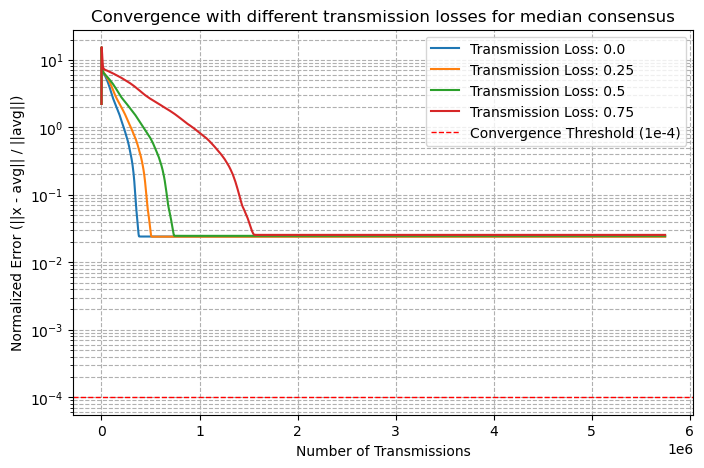

<Figure size 640x480 with 0 Axes>

In [7]:
# Now plot unicast pdmm with different transmission losses
transmission_losses = [0.0, 0.25, 0.5, 0.75]
plt.figure(figsize=(8, 5))

for loss in transmission_losses:
    k, real_median, pdmm_history_losses, transmissions_losses = median_consensus(adjacency, coords_augmented[:, 2], num_iters=5000, c=0.32, verbose=False,
                                                Broadcast=False, transmission_loss=loss, min_error=1e-4, synchronous=True)
    
    # Calculate the normalized error at each iteration for the current transmission loss
    losses_errors = [np.linalg.norm(x - real_median) / np.linalg.norm(real_median) for x in pdmm_history_losses]
    
    # Plot the error vs transmissions for the current transmission loss
    
    plt.semilogy(transmissions_losses, losses_errors, label=f'Transmission Loss: {loss}')

plt.axhline(1e-4, color='red', linestyle='--', label='Convergence Threshold (1e-4)', linewidth=1)
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.xlabel('Number of Transmissions')
plt.ylabel('Normalized Error (||x - avg|| / ||avg||)')
plt.title(f'Convergence with different transmission losses for median consensus')
plt.grid(True, which='both', ls='--')
plt.legend()
plt.show()
plt.savefig('convergence_median_consensus_uni_different_transmissions_losses.pdf', bbox_inches='tight', dpi=300)